<a href="https://colab.research.google.com/github/daoudecho/Enter-to-TensorFlow/blob/master/Chest_X_Ray_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [0]:
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
therohk/ireland-historical-news                           The Irish Times - Waxy-Wany News                   47MB  2019-08-24 15:36:54           1611  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45          15057  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           7980  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                 94MB  2019-08-30 00:09:59           5896  
r3w0p4/bournemouth-venues                                 Venues in Bournemouth         

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content 

100% 1.15G/1.15G [00:14<00:00, 69.7MB/s]
100% 1.15G/1.15G [00:14<00:00, 82.7MB/s]


In [0]:
import os
!apt install pv
!unzip -o /content/chest-xray-pneumonia.zip  | pv -l >/dev/null
os.remove('chest-xray-pneumonia.zip')
!unzip -o /content/chest_xray.zip  | pv -l >/dev/null
os.remove('chest_xray.zip')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  doc-base
The following NEW packages will be installed:
  pv
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 48.3 kB of archives.
After this operation, 123 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 pv amd64 1.6.6-1 [48.3 kB]
Fetched 48.3 kB in 0s (138 kB/s)
Selecting previously unselected package pv.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../archives/pv_1.6.6-1_amd64.deb ...
Unpacking pv (1.6.6-1) ...
Setting up pv (1.6.6-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
2.00  0:00:09 [ 212m/s] [  <=>                                                 ]
11.8k 0:00:15 [ 781 /s] [                <=>                                   ]


In [0]:
# Path to data
data_dir  = '/content/chest_xray/'
train_dir = data_dir+'train/'
test_dir  = data_dir+'test/'
val_dir   = data_dir + 'val/'

In [0]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir + 'NORMAL/'
pneumonia_cases_dir = train_dir + 'PNEUMONIA/'

print("Datasets:\t",os.listdir(data_dir))
print("Train:\t", os.listdir(train_dir))
print("Test:\t", os.listdir(test_dir))

Datasets:	 ['test', '.DS_Store', 'train', 'val']
Train:	 ['PNEUMONIA', 'NORMAL', '.DS_Store']
Test:	 ['PNEUMONIA', 'NORMAL', '.DS_Store']


In [0]:
print(len(data_dir))
print(len(train_dir))
print(len(test_dir))
print(len(val_dir))

20
26
25
24


In [0]:
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

## Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                            
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                            )

Using TensorFlow backend.


In [0]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
__________________________________________

In [0]:

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(150,150),
	class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
	test_dir,
	target_size=(150,150),
	class_mode='binary'
)

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25
163/163 [==============================] - 79s 487ms/step - loss: 0.5750 - acc: 0.7393 - val_loss: 0.5535 - val_acc: 0.6875
Epoch 2/25
163/163 [==============================] - 79s 484ms/step - loss: 0.4120 - acc: 0.8121 - val_loss: 1.2246 - val_acc: 0.5000
Epoch 3/25
163/163 [==============================] - 80s 489ms/step - loss: 0.3484 - acc: 0.8355 - val_loss: 0.5093 - val_acc: 0.8750
Epoch 4/25
163/163 [==============================] - 80s 494ms/step - loss: 0.2991 - acc: 0.8702 - val_loss: 0.4016 - val_acc: 0.8750
Epoch 5/25
163/163 [==============================] - 79s 486ms/step - loss: 0.2663 - acc: 0.8836 - val_loss: 0.6710 - val_acc: 0.6250
Epoch 6/25
163/163 [==============================] - 80s 493ms/step - loss: 0.2543 - acc: 0.8915 - val_loss: 0.4577 - val_acc: 0.8125
Epoch 7/25
163/163 [==============================] - 80s 492ms/ste

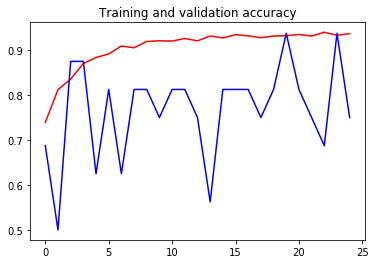

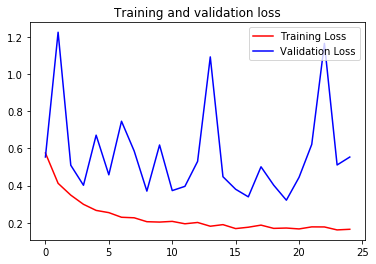

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Normal")
  else:
    print(fn + " is a Pneumonia")

Saving normal.jpg to normal.jpg
[0.]
normal.jpg is a Pneumonia
